# Load Dataset

In [3]:
#from google.colab import drive
#drive.mount('/content/drive')

In [1]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt
import seaborn as sns

d:\Anaconda\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.0' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
d:\Anaconda\lib\site-packages\pandas\core\arrays\masked.py:62: UserWarning: Pandas requires version '1.3.4' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


In [2]:
df = pd.read_csv("Clustered_Customer_Data.csv")
print(df.head())

   Unnamed: 0      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0           0    40.900749           0.818182      95.40              0.00   
1           1  3202.467416           0.909091       0.00              0.00   
2           2  2495.148862           1.000000     773.17            773.17   
3           3  1666.670542           0.636364    1499.00           1499.00   
4           4   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1           

In [34]:
cluster = df.columns[17]
df = df.drop(df.columns[0], axis=1)
df = df.drop(df.columns[17], axis=1)
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


# Data Analysis

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CREDIT

In [ ]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.612411,2895.063757,2330.588021,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,170.857654,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,335.628312,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,864.206542,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [ ]:
df.isna().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

# Data Preprocessing

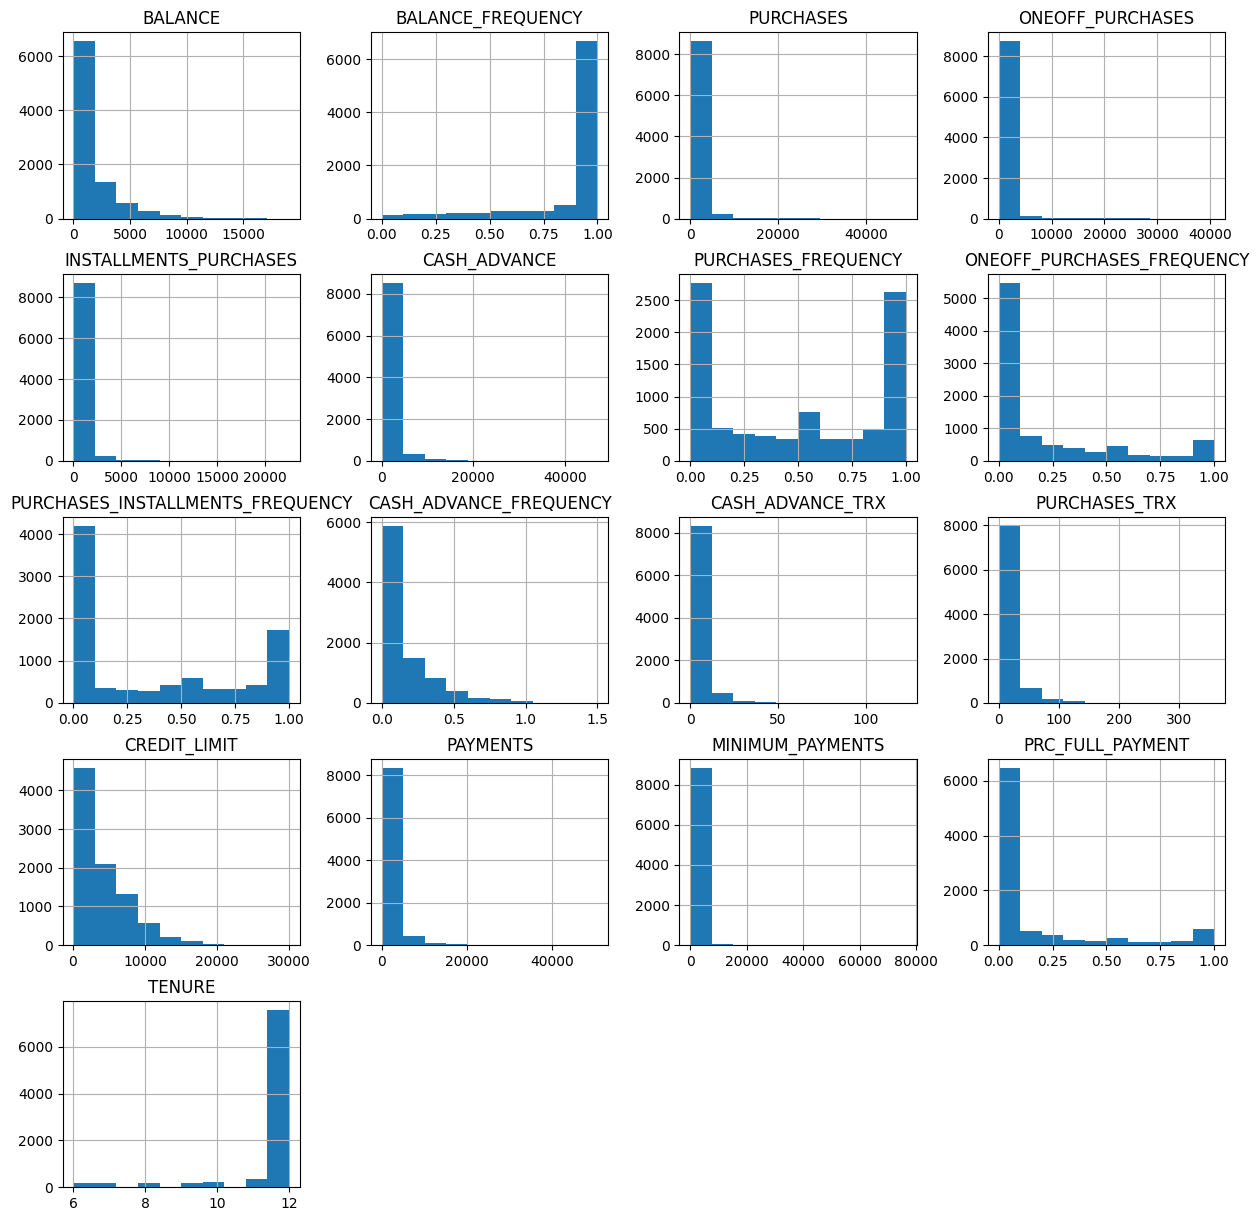

In [ ]:
df.hist(figsize=(15, 15))
plt.show()

In [35]:
# Phân loại các cột dữ liệu
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']
discrete_features = [feature for feature in numerical_features if len(df[feature].unique())<25]
continuous_features = [feature for feature in numerical_features if feature not in discrete_features]
categorical_features = [feature for feature in df.columns if feature not in numerical_features]
binary_categorical_features = [feature for feature in categorical_features if len(df[feature].unique()) <=3]
print("Numerical Features Count {}".format(len(numerical_features)))
print("Discrete features Count {}".format(len(discrete_features)))
print("Continuous features Count {}".format(len(continuous_features)))
print("Categorical features Count {}".format(len(categorical_features)))
print("Binary Categorical features Count {}".format(len(binary_categorical_features)))

Numerical Features Count 17
Discrete features Count 1
Continuous features Count 16
Categorical features Count 0
Binary Categorical features Count 0


In [36]:
# Xem các cột có outliers
outliers_features = [feature for feature in continuous_features if feature not in ['Sunshine','Humidity3pm']]
print(outliers_features)


['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT']


In [37]:
# Vẽ đồ thị box_plot xem các outliers

def plot_boxplot(df, continuous_features):
    # copy dataframe
    data = df[continuous_features].copy()
    # Tạo subplots 
    fig, axes = plt.subplots(nrows=len(data.columns)//2, ncols=2,figsize=(15,40))
    fig.subplots_adjust(hspace=0.7)
    
    # Lập fontdict
    font = {'family': 'serif',
        'color':  'darkblue',
        'weight': 'normal',
        'size': 16,
        }
    
    for ax, feature in zip(axes.flatten(), data.columns):
        sns.boxplot(data[feature],ax=ax)
        ax.set_title(f'{feature}', fontdict=font)
    plt.show()

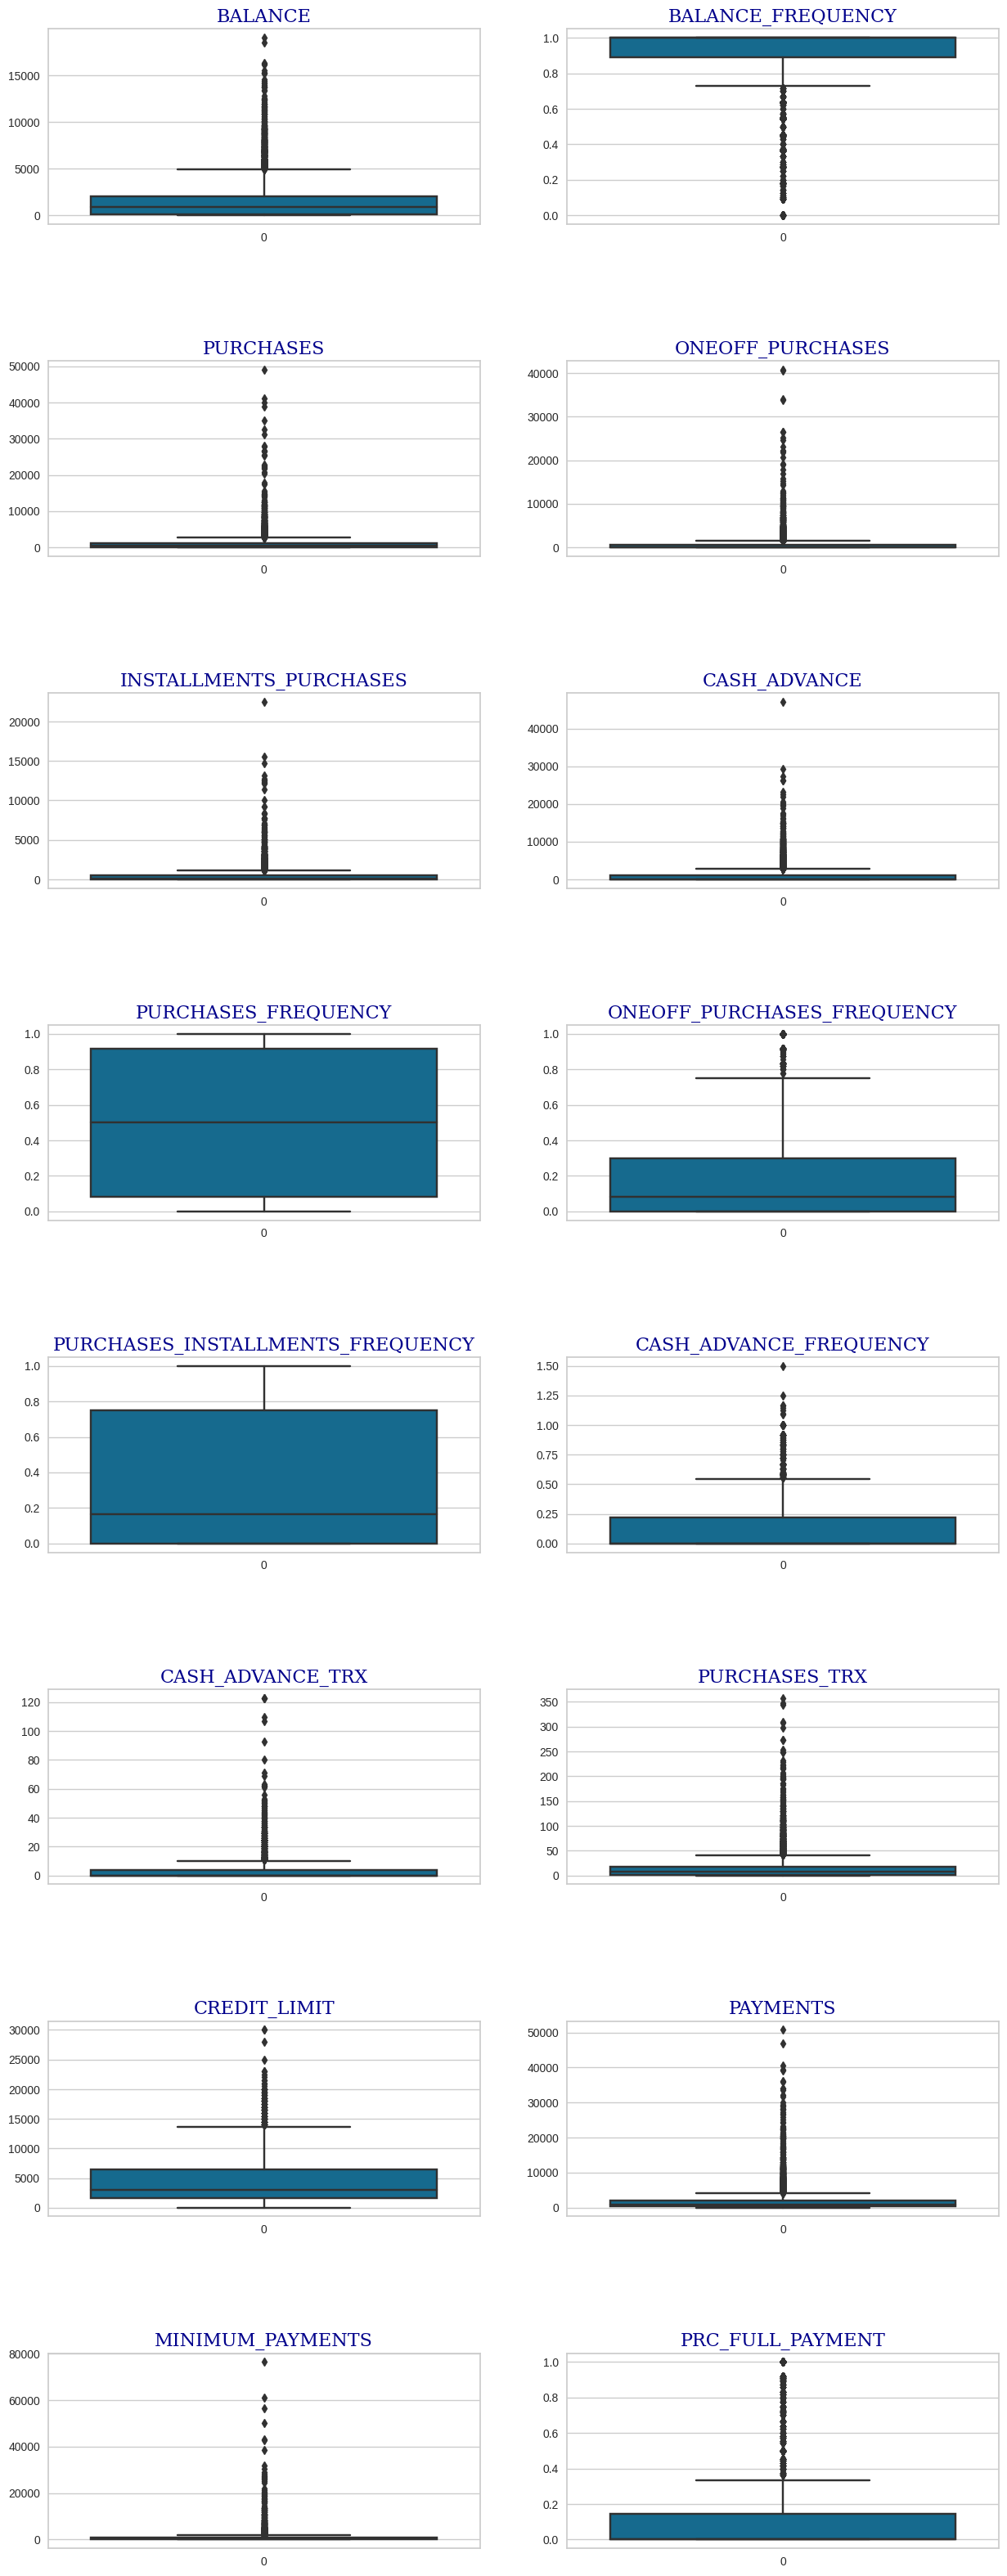

In [38]:
plot_boxplot(df, continuous_features)

In [39]:
# Xử lý outliers

def processing_outliers(df, outliers_features):
    data = df.copy()
    for feature in data[outliers_features].columns:
        Q3 = data[feature].quantile(0.75)
        Q1 = data[feature].quantile(0.25)
        IQR = Q3 - Q1
        lower_limit = round(Q1 - 1.5 * IQR)
        upper_limit = round(Q3 + 1.5 * IQR)
        data.loc[data[feature] >= upper_limit,feature] = upper_limit
        data.loc[data[feature] <= lower_limit,feature] = lower_limit
#        data = data[(data[feature] < upper_limit) & (data[feature] > lower_limit)]
    return data

In [40]:
df = processing_outliers(df,  outliers_features)


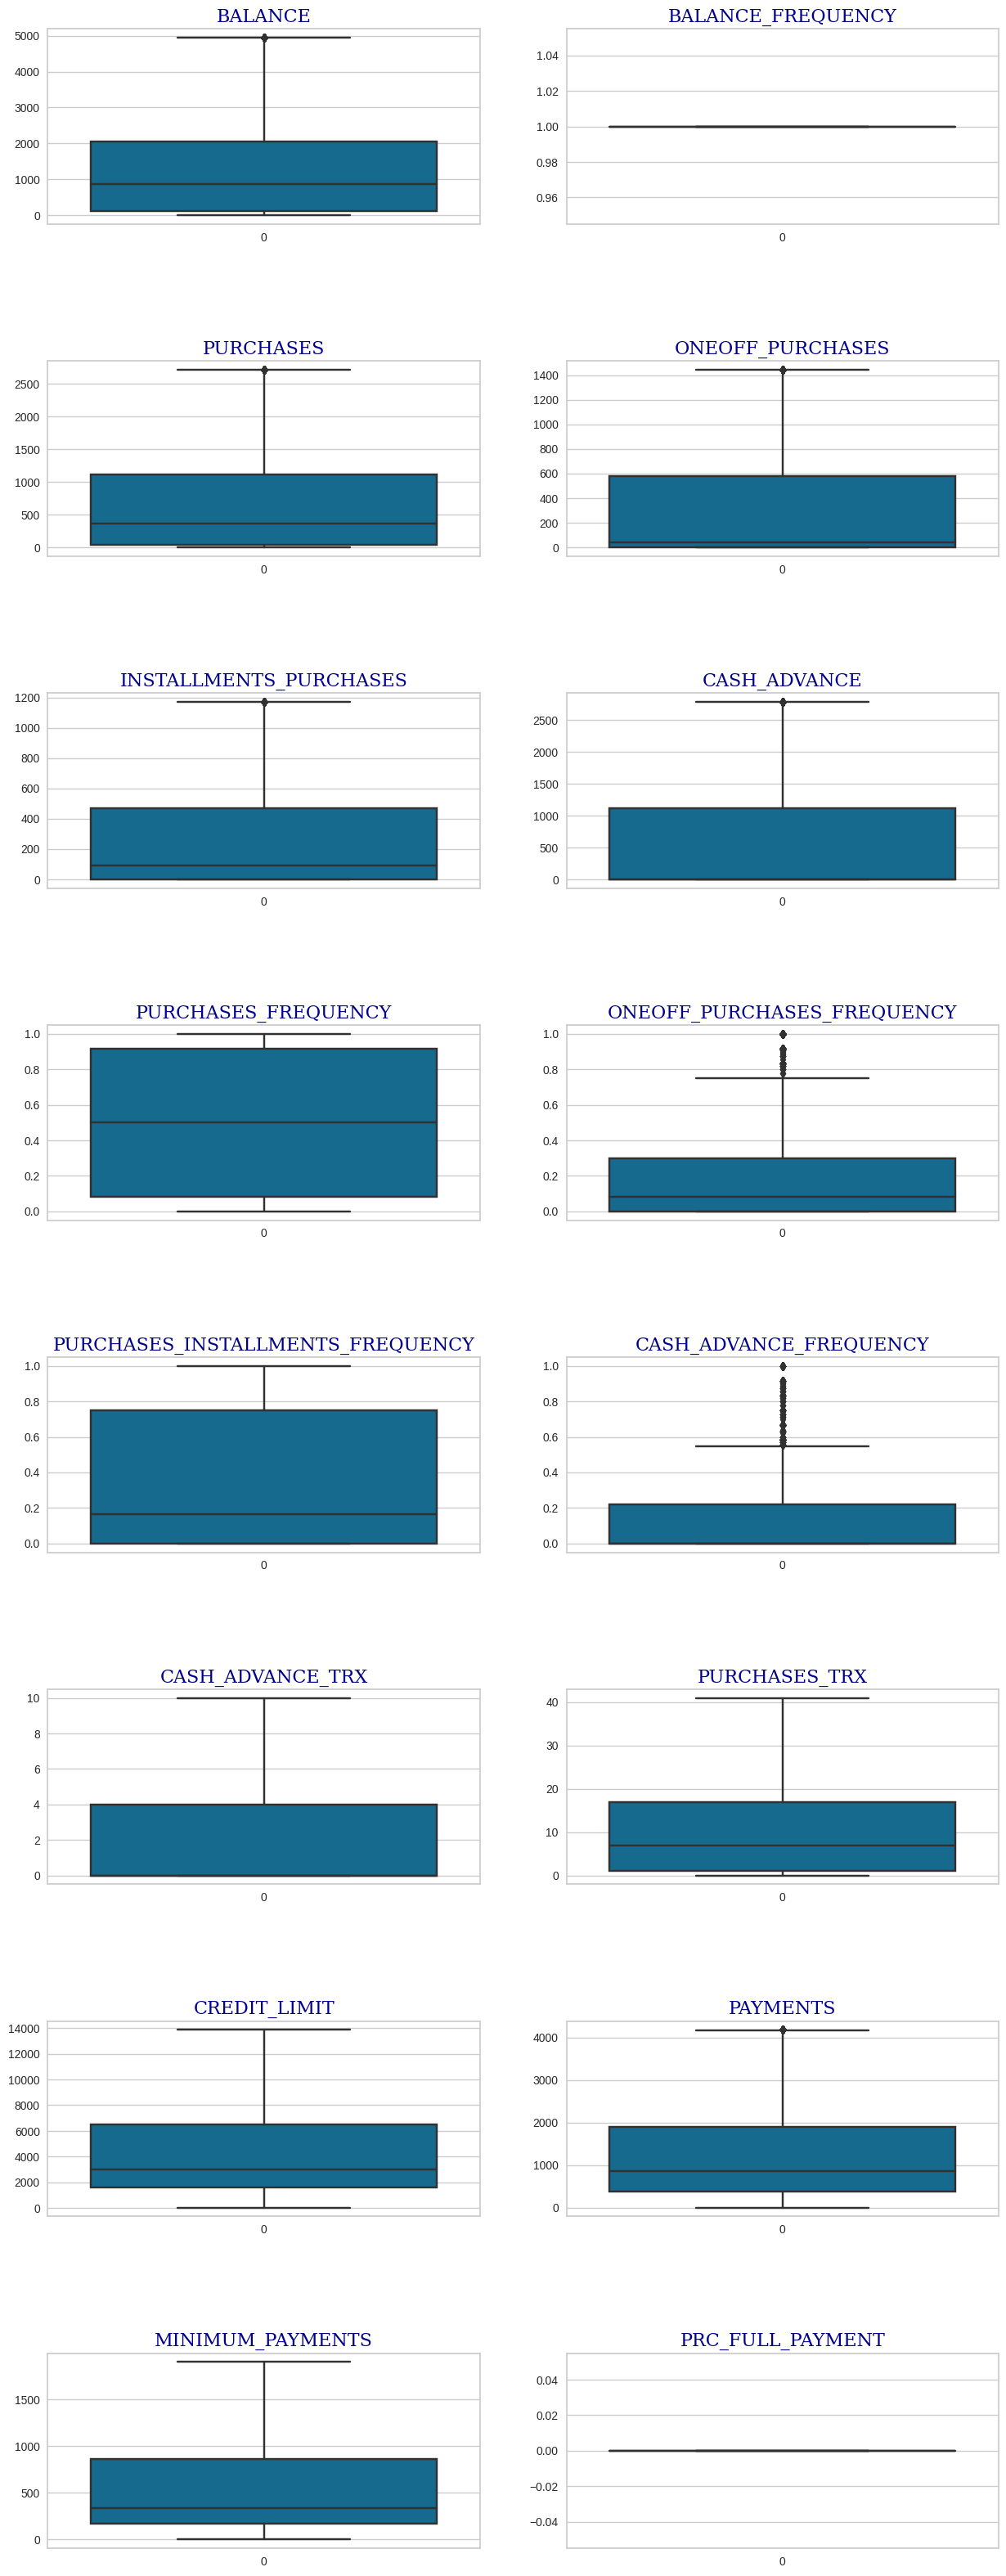

In [41]:
plot_boxplot(df, continuous_features)

# Feature Engineering

In [42]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.0,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.0,8950.000000
mean,1390.514625,1.0,737.160840,354.413316,295.585568,672.520384,0.490351,0.202458,0.364437,0.134972,2.383128,11.623799,4419.304199,1347.091248,593.691703,0.0,11.517318
std,1537.551539,0.0,879.560687,511.940728,396.268585,998.623835,0.401371,0.298336,0.397448,0.199257,3.417878,13.041645,3383.755481,1272.822027,571.994789,0.0,1.338331
min,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.0,6.000000
25%,128.281915,1.0,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,170.857654,0.0,12.000000
50%,873.385231,1.0,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,335.628312,0.0,12.000000
75%,2054.140036,1.0,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,864.206542,0.0,12.000000
max,4943.000000,1.0,2716.000000,1444.000000,1172.000000,2785.000000,1.000000,1.000000,1.000000,1.000000,10.000000,41.000000,13850.000000,4178.000000,1904.000000,0.0,12.000000


In [43]:
# Xóa các cột chỉ có 1 giá trị
df.drop( columns = ['BALANCE_FREQUENCY'],inplace=True)
df.drop( columns = ['PRC_FULL_PAYMENT'],inplace=True)


<Axes: >

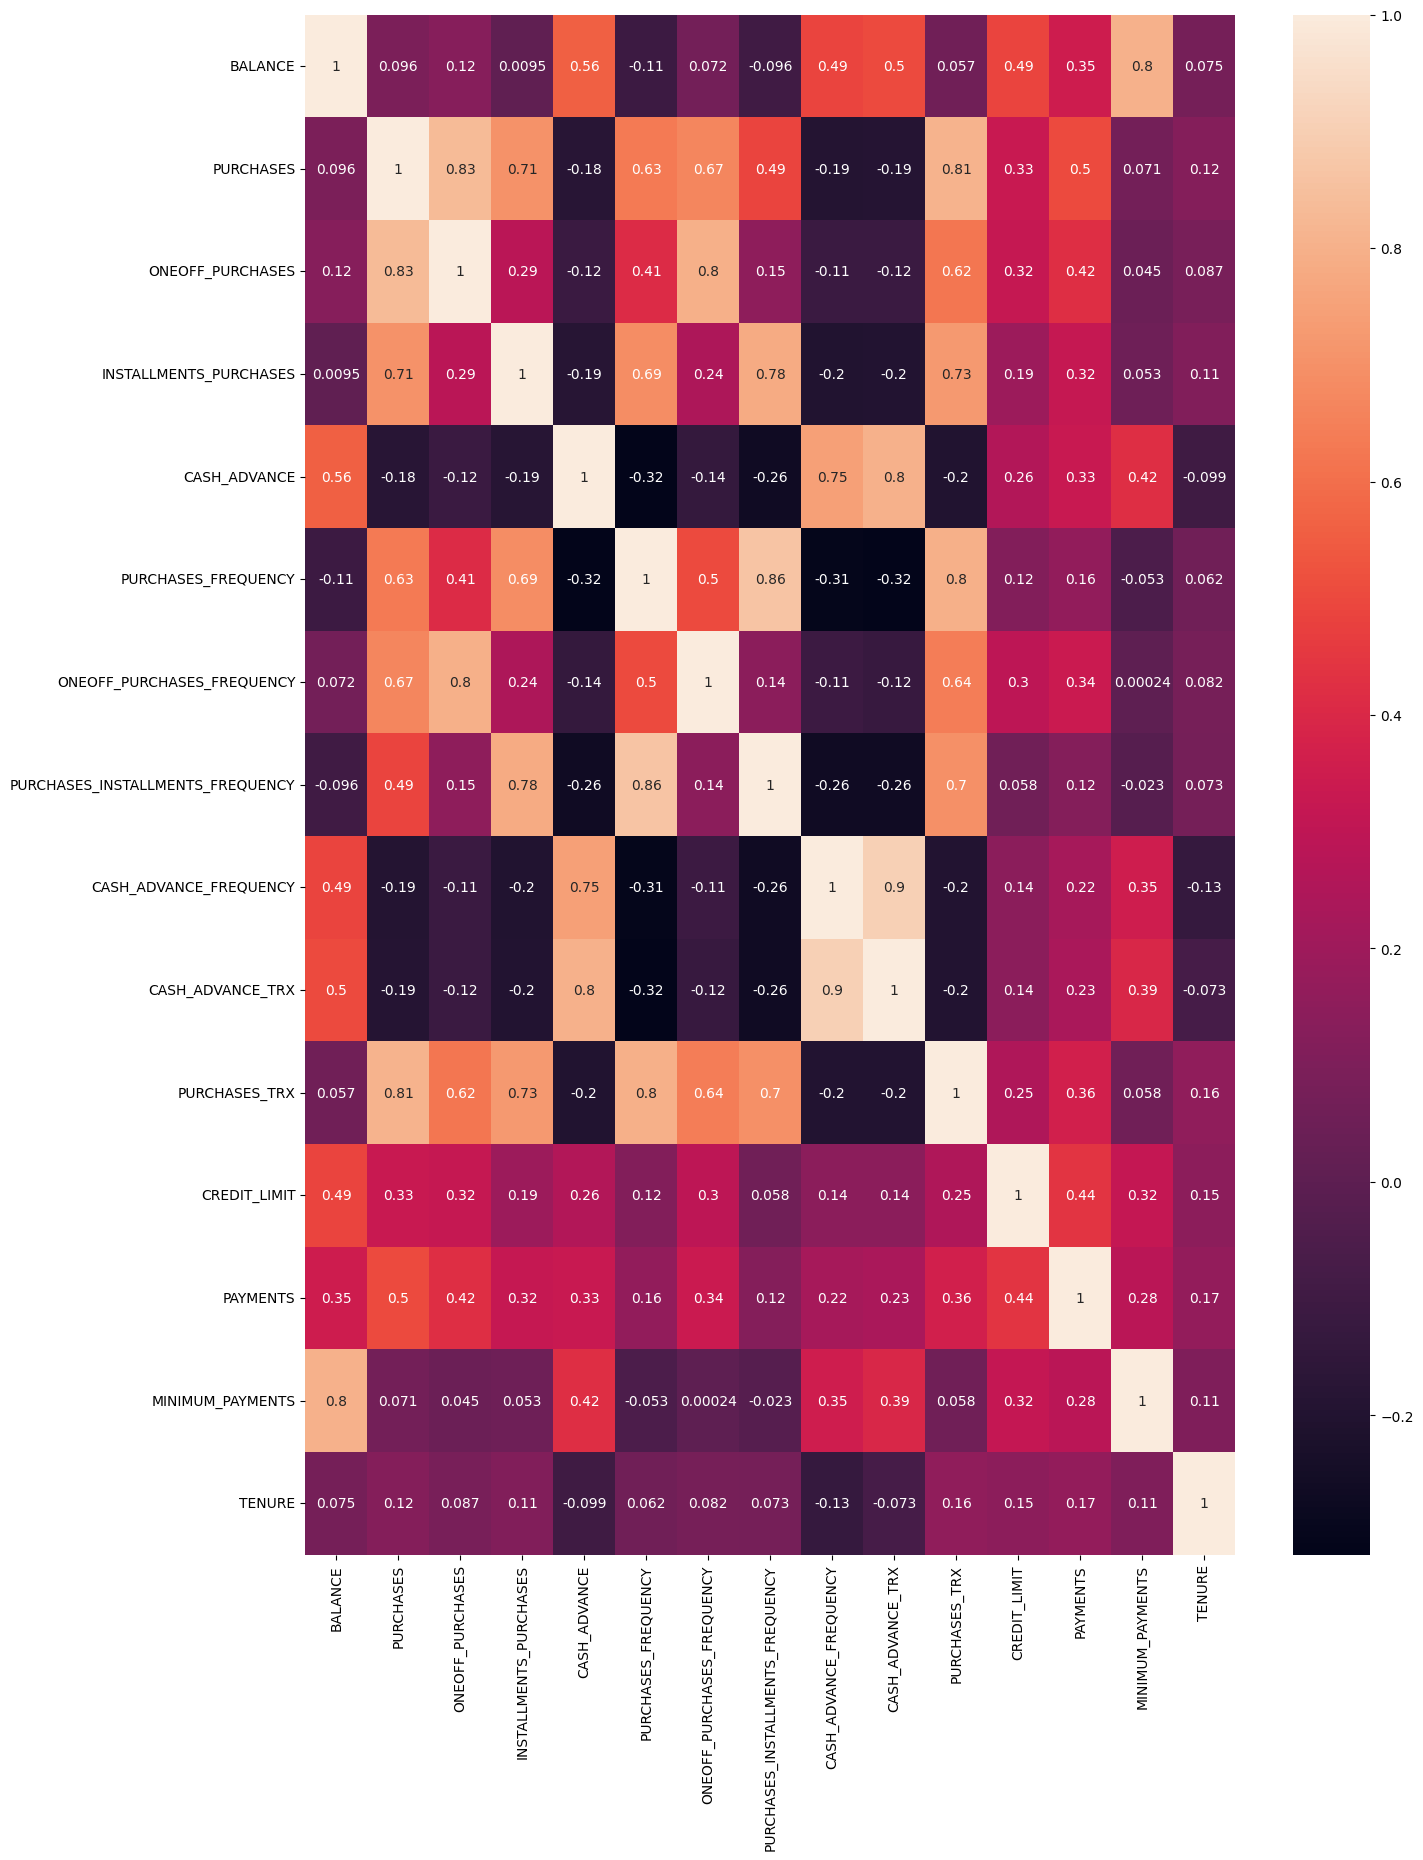

In [ ]:
plt.figure(figsize=(15,20))
sns.heatmap(df.corr(), annot=True)

# Model Part

In [44]:
data = df.copy()
data.head()

,BALANCE,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,TENURE
0,40.900749,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,12
1,3202.467416,0.00,0.00,0.0,2785.000000,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,12
2,2495.148862,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,12
3,1666.670542,1499.00,1444.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,12
4,817.714335,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,12


In [45]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

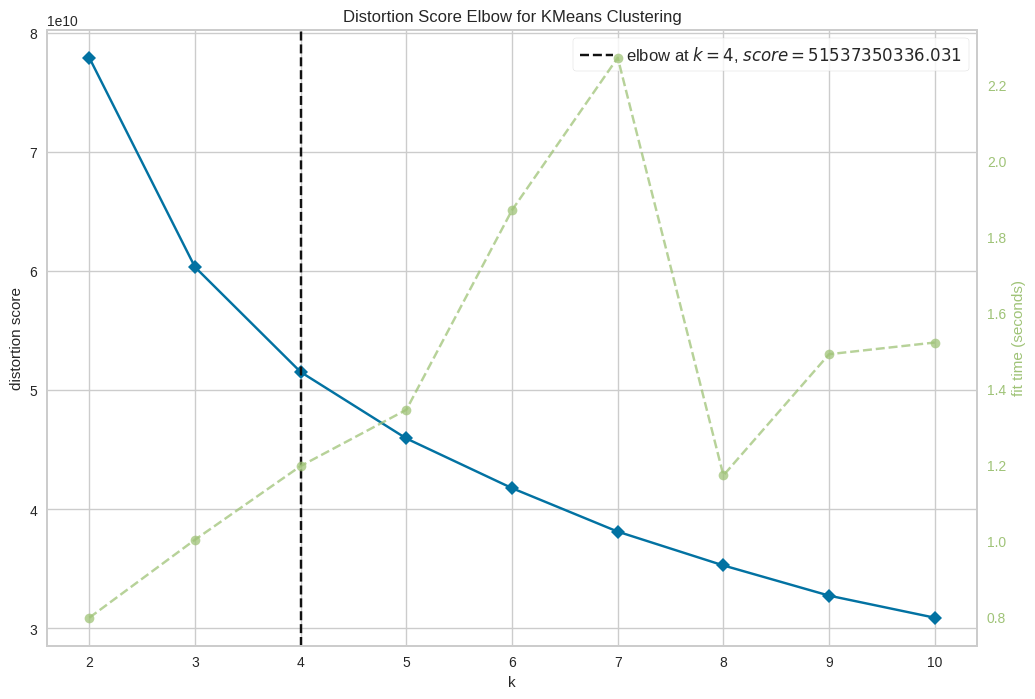

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [46]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
plt.figure(figsize=(12, 8))
elbow_graph = KElbowVisualizer(KMeans(random_state=123), k=10)
elbow_graph.fit(df)
elbow_graph.show()

In [117]:
# Chọn k = 4
kmeans_model = KMeans(n_clusters = 4)
kmeans_model.fit(scaled_data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

In [118]:
kmeans_model.labels_

array([0, 3, 1, ..., 2, 0, 0], dtype=int32)

In [119]:
kmeans_model.predict(scaled_data)

array([0, 3, 1, ..., 2, 0, 0], dtype=int32)

In [120]:
kmeans_model.cluster_centers_

array([[-0.36075304, -0.54445071, -0.29032948, -0.63143061, -0.30803623,
        -0.73220677, -0.27694221, -0.72910671, -0.24615083, -0.28018485,
        -0.64550625, -0.37105621, -0.4733357 , -0.309971  , -0.02888364],
       [ 0.30838816,  1.69215567,  1.61873515,  0.99090021, -0.25498493,
         1.02161108,  1.52165615,  0.67950181, -0.27897477, -0.27352755,
         1.51467278,  0.72851867,  0.95573649,  0.15836271,  0.26022924],
       [-0.55278165, -0.01330791, -0.47892033,  0.64096658, -0.55624126,
         0.92628789, -0.42698137,  1.10344248, -0.53327819, -0.54862109,
         0.31758626, -0.38382606, -0.39343242, -0.32508731, -0.05433897],
       [ 1.13154583, -0.51500356, -0.36853544, -0.49080187,  1.57288288,
        -0.6778634 , -0.3676866 , -0.57831796,  1.44184576,  1.52481913,
        -0.55832546,  0.53316712,  0.53288993,  0.88539621, -0.12388707]])

### Silhouette

In [121]:
# Sử dụng Silhouette Coefficient để đánh giá việc phân cụm
from sklearn.metrics import silhouette_samples, silhouette_score

In [122]:
range_n_clusters = [i for i in range(2,10)]
print(range_n_clusters)

[2, 3, 4, 5, 6, 7, 8, 9]


In [123]:
# Tính trung bình silhouette score
from sklearn.cluster import KMeans
values_silhouette = []
for k in range_n_clusters:
    grouper = KMeans(n_clusters=k)
    labels = grouper.fit_predict(scaled_data)
    mean_silhouette = silhouette_score(scaled_data, labels)
    values_silhouette.append(mean_silhouette)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [124]:
grouper_kmeans = KMeans(n_clusters = 4)
labels_kmeans = grouper_kmeans.fit_predict(scaled_data)
print("Labels K-means: ", labels_kmeans)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Labels K-means:  [0 3 1 ... 2 0 0]


In [125]:
# Sử dụng PCA
from sklearn.decomposition import PCA #Khai báo thư viện PCA
pca = PCA(n_components=len(data.columns)) #khai báo 
pca.fit(scaled_data)

PCA(n_components=15)

In [126]:
#cho ta biết được các thành phần phủ được bao nhiêu lượng thông tin của data gốc
pca.explained_variance_ratio_*100

array([34.56135315, 25.22864756,  9.99591149,  7.90713092,  5.68927336,
        4.65154294,  3.69590343,  2.34205108,  1.57021665,  1.31738965,
        1.0463545 ,  0.87957306,  0.55797703,  0.35924566,  0.19742953])

In [127]:
pca = PCA(n_components=3) #dùng pca 3 thành phần
pca_df = pd.DataFrame(pca.fit_transform(scaled_data), columns=["pca_1", "pca_2", "pca_3"])#tạo ra dataframe với 2 thành phần là pca1, pca2
pca_df

,pca_1,pca_2,pca_3
0,-1.527282,-2.282559,0.346817
1,-2.228809,2.680803,0.250425
2,1.397003,0.030136,2.242536
3,-0.222823,0.111545,2.089509
4,-1.675806,-1.836524,0.721708
...,...,...,...
8945,-0.118116,-2.580684,-1.643943
8946,-0.140738,-2.080350,-1.871039
8947,-0.661654,-2.622552,-1.220427
8948,-2.601867,-2.034090,0.140132


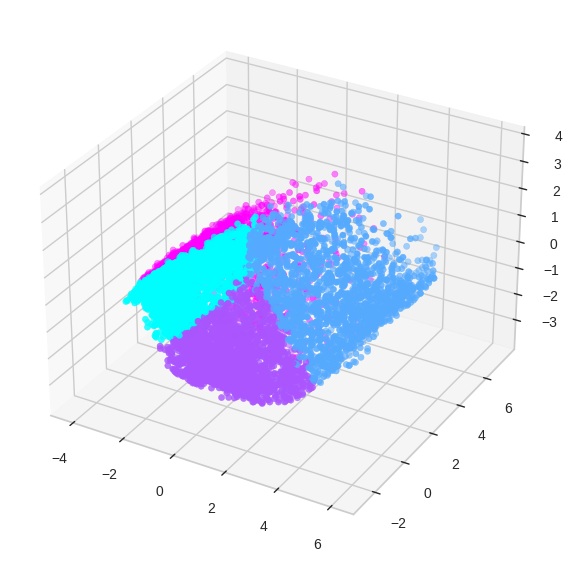

In [128]:
plt.figure(figsize=(12, 7))
ax = plt.subplot(projection="3d")
ax.scatter(pca_df.pca_1, pca_df.pca_2, pca_df.pca_3, c=kmeans_model.labels_, cmap="cool")
plt.show()

In [133]:
# Đánh giá thuật toán Kmeans
# The Silhouette Coefficient có giá trị từ -1 đến 1. Nếu giá trị này dương và càng gần 1 thì thuật toán Kmeans tốt
print("The Silhouette Coefficient K-mean is:", silhouette_score(scaled_data, kmeans_model.labels_))

The Silhouette Coefficient K-mean is: 0.22538265161779117


### Save and load model

In [135]:
#Save model
import pickle #import thư viện pickle
file_name = "model.sav" #Tạo tên cũng như đường dẫn lưu model (nếu chỉ để tên model không thì sẽ lưu tại thư mục hiện hành)
pickle.dump(kmeans_model, open(file_name, "wb")) #nhận vào tên thư viện và đường dẫn lưu trữ model

In [136]:
#Load model
file_name = "model.sav"
model = pickle.load(open(file_name, "rb"))

In [138]:
clustered = kmeans_model.labels_
cluster_0 = np.where(clustered==0) #index các data samples thuộc cluster 1
cluster_1 = np.where(clustered==1) #index các data samples thuộc cluster 2
cluster_2 = np.where(clustered==2) #index các data samples thuộc cluster 3
cluster_3 = np.where(clustered==3) #index các data samples thuộc cluster 4

In [139]:
#Lấy ra các data samples thuộc cluster 1
data.iloc[cluster_0]

,BALANCE,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,TENURE
0,40.900749,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,12
3,1666.670542,1499.00,1444.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,12
4,817.714335,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,12
8,1014.926473,861.49,661.49,200.0,0.000000,0.333333,0.083333,0.250000,0.000000,0,5,7000.0,688.278568,311.963409,12
9,152.225975,1281.60,1281.60,0.0,0.000000,0.166667,0.166667,0.000000,0.000000,0,3,11000.0,1164.770591,100.302262,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8939,728.352548,734.40,734.40,0.0,239.891038,0.333333,0.333333,0.000000,0.166667,2,2,1000.0,72.530037,110.950798,6
8943,5.871712,20.90,20.90,0.0,0.000000,0.166667,0.166667,0.000000,0.000000,0,1,500.0,58.644883,43.473717,6
8944,193.571722,1012.73,1012.73,0.0,0.000000,0.333333,0.333333,0.000000,0.000000,0,2,4000.0,0.000000,864.206542,6
8948,13.457564,0.00,0.00,0.0,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,6


# Discussion & Conclusion

In [ ]:
''' Về dữ liệu: sau khi phân tích dữ liệu, ta thấy dữ liệu không có các giá trị na hay null, nhưng dữ liệu có nhiều outliers. 
Nếu giữ nguyên các điểm này thì sẽ làm giảm hiệu quả của thuật toán phân cụm, nên em đã xử lý bằng cách gán các outliers bằng các
giá trị cận trên và cận dưới. Loại bỏ các feature không quan trọng
Về thuật toán xác định số lượng cluster: có thể vẽ đồ thị Elbow để tìm điểm gập, tại đó việc tăng số lượng cụm không thay đổi đáng kể hiệu suất và 
cũng chính là số lượng cụm tối ưu cho bài toán. Ngoài ra, phương pháp Silhouette cũng giúp xác định số lượng cụm tối ưu bằng cách tính 
trung bình hệ số hệ silhouette, giá trị này nằm trong khoảng [-1, 1], và giá trị càng gần 1 càng tốt. Ở bài tập này, số lượng cụm tối ưu là 4
Kết luận: dùng hệ số silhouette để đánh giá thuật toán Kmeans
Kết luận: Khi áp dụng PCA 3D để trực quan sự phân bố của các điểm dữ liệu ta thấy các cụm được phân tách rõ ràng.
'''